In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [27]:
df = pd.read_csv('train_age_dataset.csv',index_col="userId")

df_ = pd.read_csv("test_age_dataset.csv",index_col="userId") 

df = df.iloc[:,1:]

df_ = df_.iloc[:,1:]

#df_.head()

In [28]:
df.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
userId,,,,,,,,,,,,,,,,,,,,,
48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [29]:
df.drop(["avgt2"],axis=1,inplace = True)
df_.drop(["avgt2"],axis=1,inplace = True)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tier,488877.0,1.975382,0.430707,1.000000,2.000000,2.000000,2.000000,3.000000e+00
gender,488877.0,1.213037,0.409454,1.000000,1.000000,1.000000,1.000000,2.000000e+00
following_rate,488877.0,0.082233,2.467781,0.000000,0.000000,0.000000,0.008621,8.953040e+02
followers_avg_age,488877.0,0.347520,0.816334,0.000000,0.000000,0.000000,0.000000,4.000000e+00
following_avg_age,488877.0,0.403049,0.925291,0.000000,0.000000,0.000000,0.000000,4.000000e+00
max_repetitive_punc,488877.0,0.739748,3.075954,0.000000,0.000000,0.000000,0.000000,6.240000e+02
num_of_hashtags_per_action,488877.0,0.000277,0.012221,0.000000,0.000000,0.000000,0.000000,2.333333e+00
emoji_count_per_action,488877.0,0.000981,0.020381,0.000000,0.000000,0.000000,0.000000,3.000000e+00
punctuations_per_action,488877.0,0.012805,0.159553,0.000000,0.000000,0.000000,0.000000,2.733333e+01
number_of_words_per_action,488877.0,0.179148,0.647588,0.000000,0.000000,0.000000,0.150183,2.626667e+02


In [31]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
tier,54320.0,1.976105,0.431142,1.000000,2.000000,2.000000,2.000000,3.000000
gender,54320.0,1.211856,0.408627,1.000000,1.000000,1.000000,1.000000,2.000000
following_rate,54320.0,0.081204,3.103205,0.000000,0.000000,0.000000,0.008621,685.277778
followers_avg_age,54320.0,0.344033,0.813081,0.000000,0.000000,0.000000,0.000000,4.000000
following_avg_age,54320.0,0.397432,0.917988,0.000000,0.000000,0.000000,0.000000,4.000000
max_repetitive_punc,54320.0,0.734794,2.822803,0.000000,0.000000,0.000000,0.000000,130.000000
num_of_hashtags_per_action,54320.0,0.000357,0.015529,0.000000,0.000000,0.000000,0.000000,2.333333
emoji_count_per_action,54320.0,0.000909,0.017456,0.000000,0.000000,0.000000,0.000000,1.692308
punctuations_per_action,54320.0,0.012117,0.130576,0.000000,0.000000,0.000000,0.000000,12.500000
number_of_words_per_action,54320.0,0.178509,0.600530,0.000000,0.000000,0.000000,0.147100,65.800000


In [32]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [33]:
'''
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
    
'''

'\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\ndef calc_vif(x):\n\n    # Calculating VIF\n    vif = pd.DataFrame()\n    vif["variables"] = x.columns\n    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]\n\n    return(vif)\n    \n'

In [34]:
#x.drop(["weekends_trails_watched_per_day","weekdays_trails_watched_per_day","content_views","following_avg_age","followers_avg_age","tier","gender"],axis = 1,inplace = True)

In [35]:
#df_.drop(["weekends_trails_watched_per_day","weekdays_trails_watched_per_day","content_views","following_avg_age","followers_avg_age","tier","gender"],axis = 1,inplace = True)

In [36]:
#calc_vif(x)

In [37]:
x.shape

(488877, 23)

In [38]:
"""
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

"""

"\nfrom sklearn.tree import DecisionTreeClassifier\nmodel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)\n# fit the model\nmodel.fit(x, y)\n# get importance\nimportance = model.feature_importances_\n# summarize feature importance\nfor i,v in enumerate(importance):\n\tprint('Feature: %0d, Score: %.5f' % (i,v))\n# plot feature importance\nplt.bar([x for x in range(len(importance))], importance)\nplt.show()\n\n"

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
X_train

array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.01694915],
       [2.        , 1.        , 0.        , ..., 0.04166667, 0.09166667,
        0.        ],
       [2.        , 2.        , 0.        , ..., 0.136     , 0.016     ,
        0.        ],
       ...,
       [2.        , 1.        , 0.        , ..., 0.        , 0.24691358,
        0.        ],
       [2.        , 1.        , 0.14876033, ..., 0.00826446, 0.        ,
        0.        ],
       [2.        , 1.        , 0.02608696, ..., 0.        , 0.        ,
        0.07826087]])

In [41]:
X_train.shape

(391101, 23)

In [42]:
#for c in [c for c in X_train.columns if np.issubdtype(X_train[c].dtype , np.number)]:
#    X_train[c] = np.log(X_train[c])

In [43]:
y_train.shape

(391101,)

In [44]:
#matplotlib.style.use('ggplot')

#X_train.hist(alpha=0.5, figsize=(16, 10))

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test = sc.transform(df_)

In [46]:
kfold = StratifiedKFold(n_splits=10)

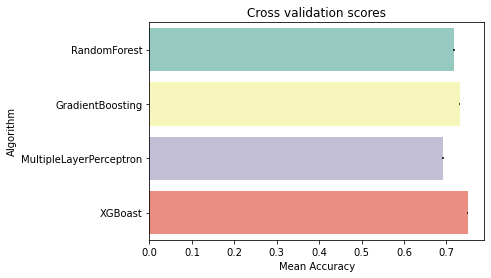

In [47]:
"""

random_state = 0
classifiers = []
#classifiers.append(DecisionTreeClassifier(random_state=random_state))
#classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[
"RandomForest","GradientBoosting","MultipleLayerPerceptron","XGBoast"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

"""

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
loss=['hinge','log','modifier_huber','squared_hinge','perceptron']
penalty = ['li','l2','elasticnet']
alpha = [0.0001, 0.001,0.01,0.1,1,10,100,1000]
learnin_rate = ['constant','optimal','invscaling','adaptive']
class_weight = [{0.3,0.5,0.2},{0.3,0.4,0.3}]
eta0 = [1,10,100]

xg_class = XGBClassifier(objective = "multi:softmax", colsample_bytree = 1,
gamma = 1,subsample = 0.8, learning_rate = 0.01, max_depth = 3,
alpha = 10,n_estimators = 1000, multilabel_ =True, num_classes = 3)

#from sklearn.metrics import jaccard_score
from sklearn.model_selection import RandomizedSearchCV


param_distributions = dict(loss = loss, penalty=penalty, alpha=alpha, learnin_rate=learning_rate, class_weight=class_weight, eta0=eta0)
random = RandomizedSearchCV(estimator = xg_class, param_distributions=param_distributions, scoring = "accuracy",
verbose = 1, n_jobs =4, n_iter = 1000)

random.fit(X_train, y_train)

XGB_best = random.best_estimator_

random.best_score_

In [ ]:
votingC = VotingClassifier(estimators=[('xgb',XGB_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [1]:
#from xgboost import XGBClassifier
#classifier = XGBClassifier()
#classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
y_pred_t = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_t)
print(cm) 
accuracy_score(y_train, y_pred_t)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

In [ ]:
 print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
X_train.shape

In [ ]:
y_pred_test = classifier.predict(test)

In [ ]:
print((y_pred.reshape(len(y_pred),1)))

In [ ]:
print((y_pred_test.reshape(len(y_pred_test),1)))

In [ ]:
ab = pd.DataFrame(y_pred_test.reshape(len(y_pred_test),1))

In [ ]:
ab.to_csv("sample_test13.csv", header = ["prediction"] , index = False)